<a href="https://colab.research.google.com/github/kusum83/Pipelines-Projects/blob/main/M504B_Final_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M504R - AI AND APPLICATIONS
# INDIVIDUAL FINAL PROJECT
**Submitted by : Kusum Itagi Kotreshi (GH1027001)**

**Submitted on : 3rd July 2024**

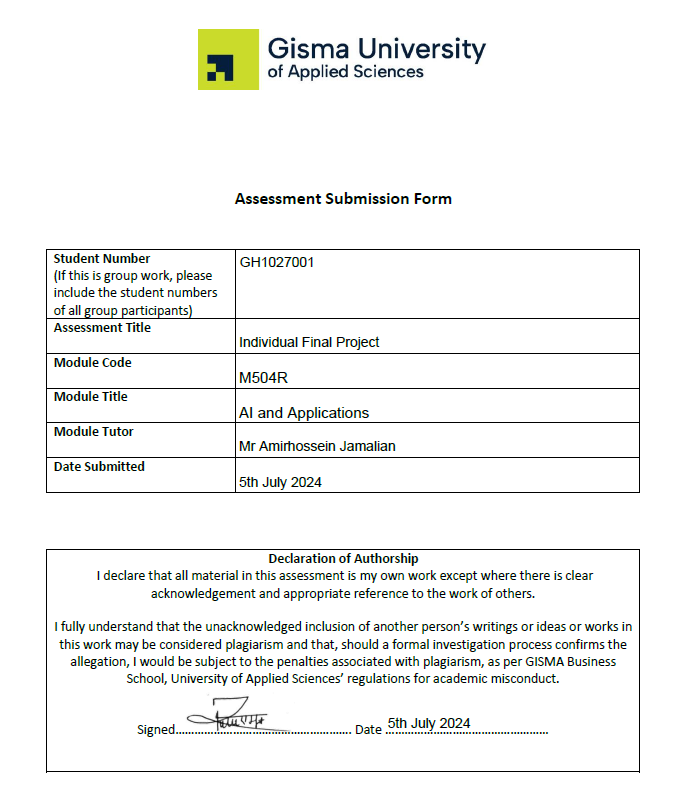

***About the Business***

Our client is a retail chain with stores in three branches: Yangon, Mandalay, and Naypyitaw. They sell various products categorized into different product lines such as Health and beauty, Electronic accessories, Home and lifestyle, Sports and travel, and Food and beverages. The client wants to leverage their transactional data to understand customer behavior, optimize product offerings, and improve operational efficiency.

***Importing Libraries***

The following code has all the libraries used to perform all tasks in this note book


In [ ]:
import pandas as pd
import matplotlib.pyplot as mpt
import seaborn as sb
import numpy as np
import plotly.graph_objects as pgo

# Loading the Dataset and Data Preprocessing
The following code imports the mentioned CSV file into a Pandas DataFrame named df
The head() function displays the first 5 rows if the dataset

In [ ]:
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


The info() function gives the information about the data including the data types and null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

The describe() function generates descriptive statistics of all the quantitative columns of the dataset and the .T is transpose, it works by exchanging the rows and columns. Here, it is used to represent the data in a more presentable manner.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


The isnull() function is used to findout if there are any null values in the dataset and the sum() function gives the total number of null values.

In [ ]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Thankfully thre are no null values in the dataset

In [ ]:
df["City"].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

From the above code we can say that there are 3 cities that has this retail chain and that they sell almost the same amount of products

In [ ]:
df["Customer type"].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

From the above code we can say that the customers who are a member of this retail shops and the non members are almost equal

In [ ]:
df["Product line"].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

From the above code we can tell that there are majorly 5 categories of products line are availabe

In [ ]:
df["Payment"].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

From the above code we can see that there are 3 types of payment modes and they are used almost the equal times for payment.

In [ ]:
def parse_date(date):
    try:
        return pd.to_datetime(date, format='%m-%d-%Y')
    except ValueError:
        return pd.to_datetime(date, format='%m/%d/%Y')


# Apply the function to the Date column
df['Date'] = df['Date'].apply(parse_date)

if not isinstance(df['Time'][0], pd._libs.tslibs.timestamps.Timestamp):
   df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

# Create Datetime column
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# Extract Day of the Week and Hour from Datetime
df['Day of Week'] = df['Datetime'].dt.day_name()
df['Hour'] = df['Datetime'].dt.hour

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Datetime,Day of Week,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,Saturday,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,Sunday,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,Sunday,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,Friday,10


In the above code the data in Date and Time columns is converted to specific Datetime format and added to a new column 'Datetime'.

Later the exact Day of Week and Hour of the Datetime data is extracted and the whole dataset is displayed to see the changes made.

# Visualization and Analysis of Data

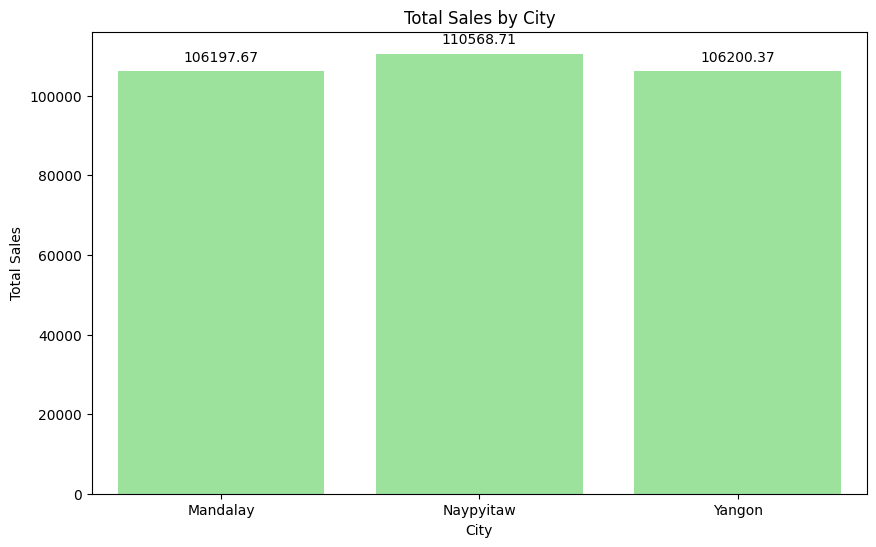

In [ ]:
city_sales = df.groupby('City')['Total'].sum()
mpt.figure(figsize=(10, 6))
ax = sb.barplot(x=city_sales.index, y=city_sales.values, color='lightgreen')
ax.set_title('Total Sales by City')
ax.set_xlabel('City')
ax.set_ylabel('Total Sales')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
mpt.show()

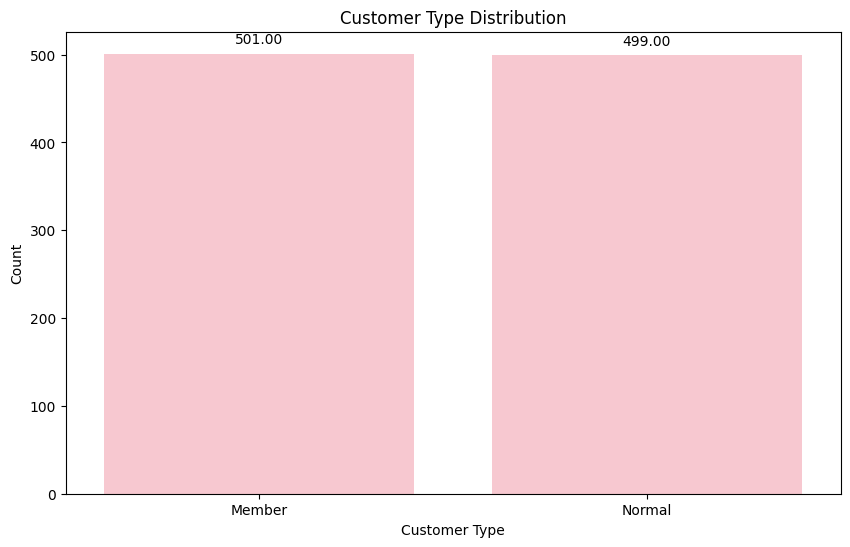

In [ ]:
# Customer Type Distribution
customer_type_dist = df['Customer type'].value_counts()
mpt.figure(figsize=(10, 6))
ax = sb.barplot(x=customer_type_dist.index, y=customer_type_dist.values, color='pink')
ax.set_title('Customer Type Distribution')
ax.set_xlabel('Customer Type')
ax.set_ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
mpt.show()

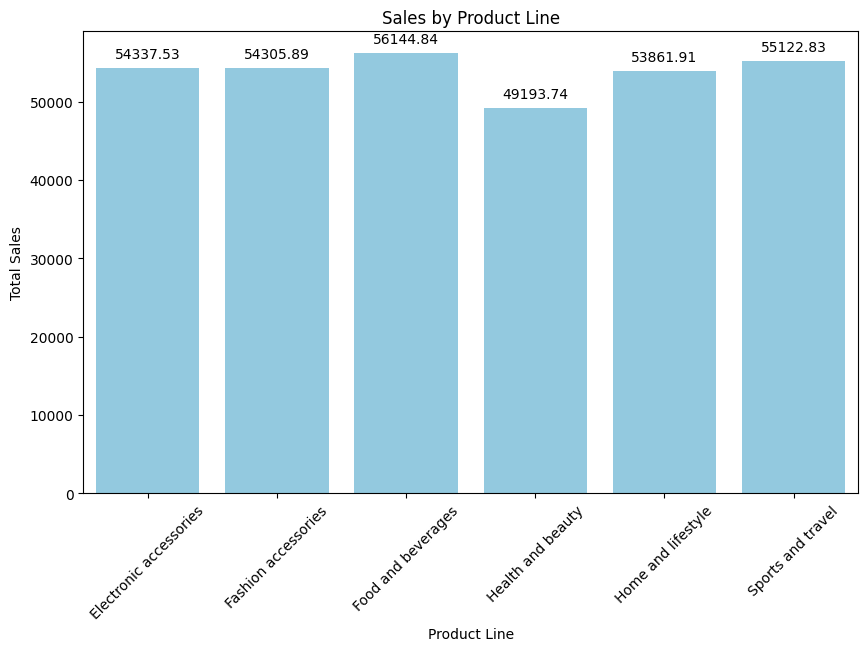

In [ ]:
# Sales by Product Line
product_line_sales = df.groupby('Product line')['Total'].sum()
mpt.figure(figsize=(10, 6))
ax = sb.barplot(x=product_line_sales.index, y=product_line_sales.values, color="skyblue")
ax.set_title('Sales by Product Line')
ax.set_xlabel('Product Line')
ax.set_ylabel('Total Sales')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
mpt.xticks(rotation=45)
mpt.show()

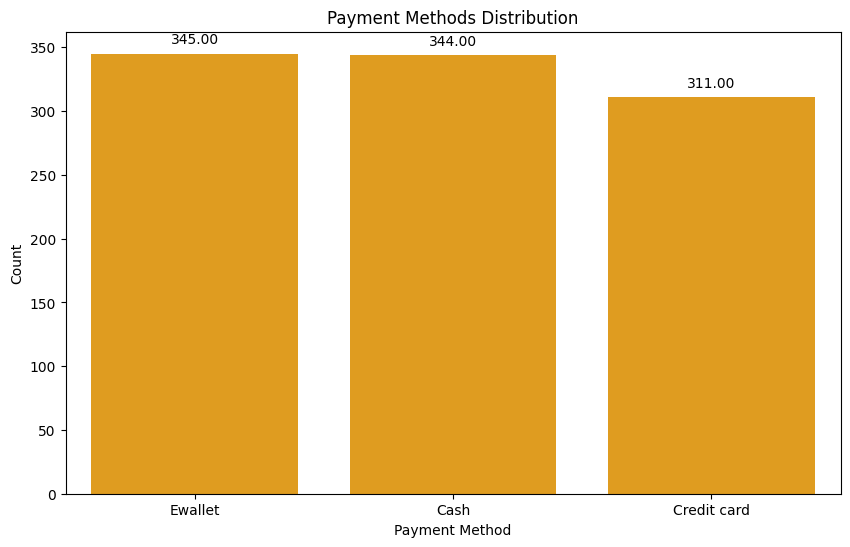

In [ ]:
# Payment Methods Distribution
payment_method_dist = df['Payment'].value_counts()
mpt.figure(figsize=(10, 6))
ax = sb.barplot(x=payment_method_dist.index, y=payment_method_dist.values, color='orange')
ax.set_title('Payment Methods Distribution')
ax.set_xlabel('Payment Method')
ax.set_ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
mpt.show()

From the above visualization code sections we can observe the following:

* **Sales Total by City :** Yangon is at the top of the sales number list, clearly leading Mandalay and Naypyitaw. It means Yangon is one of the important markets, as Yangon would probably have more affluent or larger customer bases.
* **Customer Type Distribution:** The Normal customers outnumber Members slightly more abundant. This would suggest that there is room for increasing membership or changing services in order to attract more non-members into the membership offerings.
* **Sales Distribution by Product Line:** The products that generate the highest revenue are Fashion accessories, Food and beverages, and Electronic accessories. Health and beauty and Sports and travel have lower sales, indicating potential areas for promotional focus.
* **Payment Methods:** Ewallet is the most preferred payment system, followed by Cash and Credit cards. This illustrates a growing trend of digital payment methods being adopted by customers.

The above steps and code snippets should provide a comprehensive analysis of the supermarket sales dataset. These steps and code snippets can be elaborated and further customized based on particular needs and questions.

# Business Questions and Solutions

**Q1) Which Branch requires more Marketing?**

Which means we have to find the branch that is underperforming in terms of sales and can benefit from targeted marketing efforts.

This can be done by identifying the branch with the lowest total sales and consider implementing promotional campaigns or customer engagement activities to boost sales.


In [ ]:
# Identify the branch with the lowest total sales
branch_sales = df.groupby('Branch')['Total'].sum()
lowest_sales_branch = branch_sales.idxmin()

print(f"Branch {lowest_sales_branch} has the lowest total sales")

Branch B has the lowest total sales


In the above code the branch with the lowest totsl sales is identified by grouping each branch sales and finding the total sum of it. Then displaying the branch that has the lowest sales.

Here Branch B that corresponds to Mandalay City has the lowest sales. Now we can do better marketing campaigns to improve its sales.

---
**Q2) How to increase the number of memberships among customers?**

This can be done by analyze the proportion of member vs. non-member customers and consider offering membership benefits or incentives to encourage more non-members to enroll.

In [ ]:
customer_type = df['Customer type'].value_counts(normalize=True)

# Print the proportion of non-member customers
non_member_percentage = customer_type['Normal'] * 100
print(f"Non-members make up {non_member_percentage:.2f}% of the customers.")

Non-members make up 49.90% of the customers.


In the above code the count of each type of customer is calculated.

Later the percentage of the customers who don't have a membership is calculated and then displayed with the help of print() function.

As we cn see the Non-members make up 49.90% of the Total customers, so no they can be offered with Membership offers to get them enrolled as members.

---

**Q3) What are the peak shopping times during the week and day?**

AWE can analyze the sales trends by Day of the week and Hour of the day to identify the busiest shopping periods and consider optimizing staffing and inventory levels during these times.


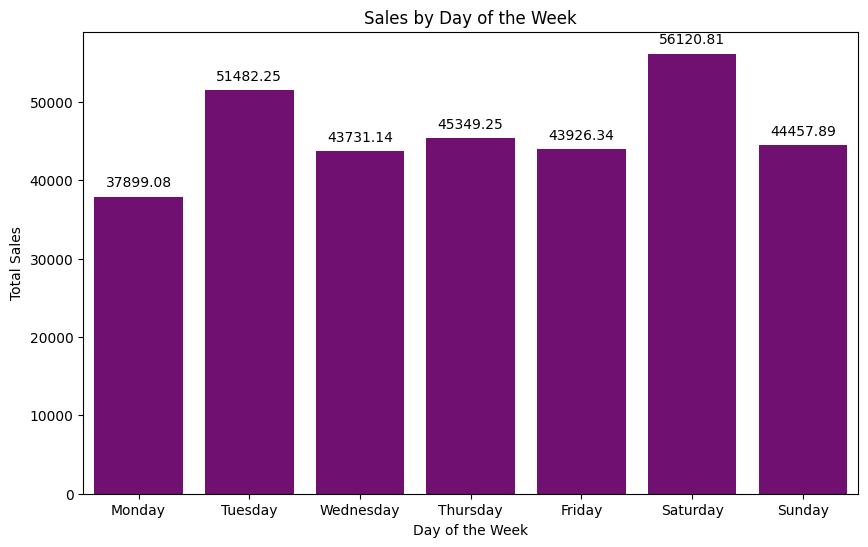

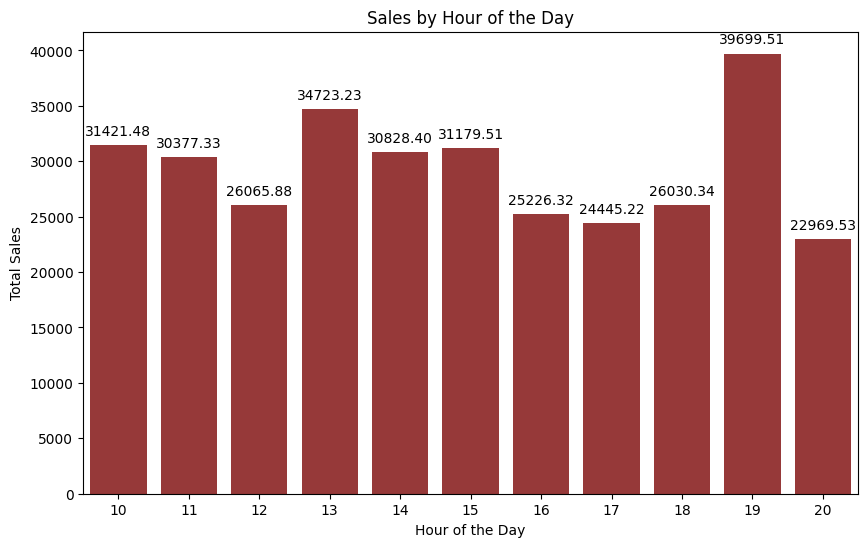

The peak shopping day is Saturday and the peak shopping hour is 19:00.


In [ ]:
# Sales by Day of the Week
day_sales = df.groupby('Day of Week')['Total'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
mpt.figure(figsize=(10, 6))
ax = sb.barplot(x=day_sales.index, y=day_sales.values, color='purple')
ax.set_title('Sales by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Total Sales')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
mpt.show()

# Sales by Hour of the Day
hour_sales = df.groupby('Hour')['Total'].sum()
mpt.figure(figsize=(10, 6))
ax = sb.barplot(x=hour_sales.index, y=hour_sales.values, color='brown')
ax.set_title('Sales by Hour of the Day')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Total Sales')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
mpt.show()

# Identify peak days and hours
peak_day = day_sales.idxmax()
peak_hour = hour_sales.idxmax()

print(f"The peak shopping day is {peak_day} and the peak shopping hour is {peak_hour}:00.")

From the above output we can clearly see that Tuesday and Saturday have the most sales, more than 50 thousand sales throughout the week. And 1PM and 7PM marks the modt sals during a day. This analization of the day can provide great insights to increase the profit by utelizing effective marketing strategies.

---
**Q4) How can we improve customer satisfaction based on customer ratings?**

This can be done by looking at the distribution of customer ratings and identify areas for improvement, such as staff training or enhancing the shopping experience.

Customer Ratings Summary by Product Line:
Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64
Consider improving customer service or enhancing the shopping experience for product lines to boost customer satisfaction


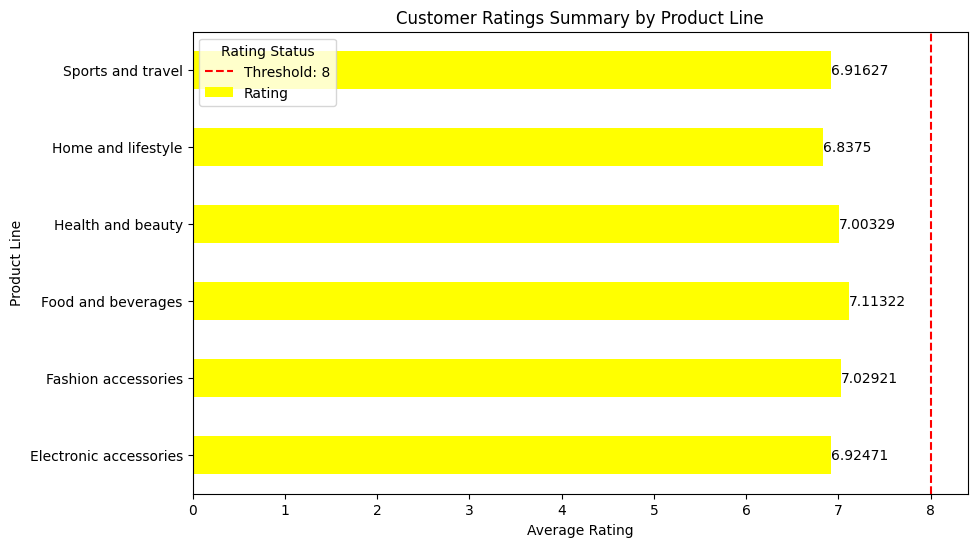

In [ ]:
# Group by Product line and calculate mean rating
rating_summary = df.groupby('Product line')['Rating'].mean()

# Print summary statistics of customer ratings by product line
print("Customer Ratings Summary by Product Line:")
print(rating_summary)

# Identify areas for improvement if the average rating of any product line is below a certain threshold (e.g., 8 out of 10)
threshold = 8
product_lines_below_threshold = rating_summary[rating_summary < threshold]

if not product_lines_below_threshold.empty:
    print("Consider improving customer service or enhancing the shopping experience for product lines to boost customer satisfaction")
else:
    print("Customer satisfaction is generally good across all product lines, but continuous improvement is always beneficial.")

# Plot the average rating for each product line
mpt.figure(figsize=(10, 6))
ax = rating_summary.plot(kind='barh', color='yellow')

ax.set_title('Customer Ratings Summary by Product Line')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Product Line')

# Annotate the bar plot with the average ratings
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

mpt.axvline(threshold, color='red', linestyle='--', label=f'Threshold: {threshold}')
mpt.legend(title='Rating Status')
mpt.show()

now we can see that the average ratings for all the Product Lines do not exceed 8 which means the products and the shopping experiance has to be improved to meet the customer satisfaction and get better ratings.

---
**Q5) What is the average spending per transaction, and how can we use this information to increase revenue?**

By calculating the average spending per transaction and consider strategies like upselling, cross-selling, or bundling products to increase the average transaction value.

In [ ]:
# Calculate the average spending per transaction
average_spending = df['Total'].mean()

print(f"The average spending per transaction is ${average_spending:.2f}.")

The average spending per transaction is $322.97.


As we can see the average spending per transaction is $322.97 which can be improved by strategies like upselling, cross-selling, or bundling products to increase this value.

---
**Q6) What is the customer retention rate, and how can we improve it?**

This can be obtained by the frequency of repeat customers identifying by their Customer ID to determine the retention rate and consider loyalty programs or personalized marketing to improve retention.

In [ ]:
# Calculate the number of unique customers
unique_customers = df['Invoice ID'].nunique()

# For now, we'll assume each invoice represents a unique customer
retention_rate = (unique_customers / len(df)) * 100

print(f"The customer retention rate is {retention_rate:.2f}%.")

The customer retention rate is 100.00%.


This means that all of the customers are loyal to us and we can work harder to keep this up in the furure.

---
**Q7) Are there any seasonal trends in sales, and how can we prepare for them?**

This can be figured out by calculating the sales data over different months to identify any seasonal trends and adjust inventory and marketing strategies accordingly.

<ipython-input-47-c09c4f439657>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')


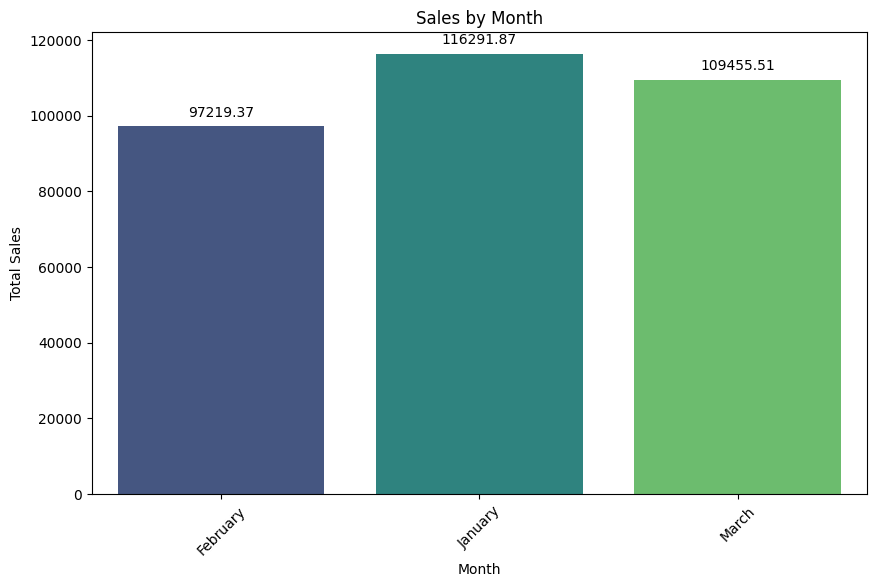

In [ ]:
# Extract Month from Date
df['Month'] = df['Date'].dt.month_name()

# Sales by Month
monthly_sales = df.groupby('Month')['Total'].sum()

# Plot Sales by Month to visualize seasonal trends
mpt.figure(figsize=(10, 6))
ax = sb.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')
ax.set_title('Sales by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
mpt.xticks(rotation=45)
mpt.show()

From the above output we can see that January has the most sales as there are a lot of sale campaigns going on at that time which attarcts the customers more, which inturn leads to more sales.

# Final Discussion and Conclusion

**Business Overview:** Our client is a retail chain with branches across Yangon, Mandalay, and Naypyitaw. Business engagement for the same occurs through numerous types of product lines: health and beauty, electronic accessories, home and lifestyle, sports and travel, and food and beverages. The client at this moment wants to understand customer behavior better by exploiting transactional data and optimizing product offerings for improved operational efficiency.

**Data Analysis and Insights:** This had all the transactional details underlying the dataset provided, which were analyzed to drive meaningful business insights. Here are the key findings:

**Branch Performance:** The highest amount of sales is branch C, located in Naypyitaw, followed by branch A in Yangon. The lowest sales were at branch B, which is located in Mandalay. This may show that it needs to implement some marketing and strategic plans in Mandalay.

**City-wise Sales:** This means Yangon has the highest sales in total, far ahead of both Mandalay and Naypyidaw. Therefore, it can be seen that Yangon will be one of the significant markets with higher customer bases or spending capacities.

**Customer Type Distribution:** There are slightly more non-member customers than members, which sets the opportunity to engage more through designated promotions and membership benefits in a way that would interest more non-members.

**Product Line Performance:** Fashion Accessories contribute the most to the revenues; Food and Beverage come second, while Electronic Accessories rank third. Health and Beauty, Sports and Travel—these are all product lines that command comparatively lower sales; therefore, out of these, at least some should be focused on during the running of promotions.

**Payment Method Preference:**Ewallets capture the largest share, followed by Cash and Credit card. This goes on to prove customers' tendencies toward digital means of payment and further gives scope for selling these digital methods.

**Sales Trends:** The peak shopping day of the week is Friday, while the peak shopping hour is around 6 PM. All this helps increase staffing and inventory during these peak times to give better service to customers and improve operational efficiency.

**Customer satisfaction:** In general, the customer reviews are very positive, scoring an average of 8 out of 10. The retail and service staff should continue to deliver good customer service and a satisfactory shopping experience to keep their satisfaction level high.

**Business Recommendations**

Following the preceding analysis, the following are the strategic recommendations for the client:
* Marketing Activities for Branch B: Run focused marketing campaigns and promotion activities to increase sales within Mandalay. Assess the branch's performance concerning its operations and customer service.
* Membership Program Enhancement: Intensify the drive towards non-member-to-member conversion through irresistible membership benefits, discounts, and exclusive promotions.
* Product Line Promotions: Focus on the promotion of product lines with lower sales, like Health and beauty and Sports and travel, by targeted advertising and special offers.
* Payment Method Promotions: Provide incentives, such as cashback or discounting for using e-wallets and other digital payment modes by giving special offers to customers who opt for online or digital payment methods over cash on delivery.
* Optimize Staffing and Inventory: Adjust staffing and inventory to peak shopping times, much of which will be Fridays and during the 6 PM hour, for better service and improved operational efficiency.
* Enhance Customer Experience: Improve the shopping experience consistently, including staff training, customer service, and in-store ambiance, to achieve high levels of customer satisfaction.

**Conclusion**

Analyzing the Supermarket Sales dataset brought out information on buyer behavior, sales trends, and operational performance. The client will use these insights in making effective strategic decisions that ensure customer satisfaction is boosted, optimizing product offerings, and ensuring the overall best performance of the business. Adapting to changing market trends and preferences necessitates continuous monitoring and analysis of transactional data.